### Importar libreríras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos

In [3]:
# Cargar la base de datos
data = pd.read_csv("C:/Users/juanj/OneDrive/Documentos/FONAG/Optimizacion/SalveFacchaDique5m.csv") #Reemplazar con ubicación
data['Fecha de muestra'] = pd.to_datetime(data['Fecha de muestra'])

# Temperatura

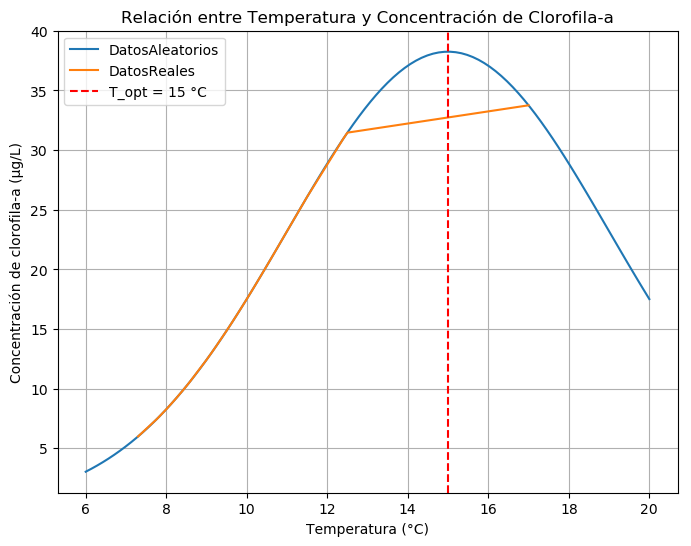

In [4]:
# Definir la función gaussiana
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Parámetros de la función
mu = 15  # Temperatura óptima en °C sugerido por bibliografía 15°
sigma = 4  # Desviación estándar en °C sugerido por bibliografía 4°
A = max(data['CLOROFILA (ug/l)'])  # Amplitud máxima de la concentración de clorofila-a en µg/L

# Rango de temperaturas de 6°C a 20°C
temperaturas1 = np.linspace(6, 20, 100)

# Rango de temperaturas reales
temperaturas = data['TEMPERATURA MUESTRA (C)'].dropna()
temperaturas = temperaturas.sort_values()

# Calcular la concentración de clorofila-a para cada temperatura
concentracion_clorofila = gaussian(temperaturas, mu, sigma, A)
concentracion_clorofila1 = gaussian(temperaturas1, mu, sigma, A)

# Graficar relación temperatura-clorofila
plt.figure(figsize=(8, 6))
plt.plot(temperaturas1, concentracion_clorofila1, label='DatosAleatorios')
plt.plot(temperaturas, concentracion_clorofila, label='DatosReales')
plt.axvline(x=mu, color='r', linestyle='--', label=f'T_opt = {mu} °C')
plt.title('Relación entre Temperatura y Concentración de Clorofila-a')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Concentración de clorofila-a (µg/L)')
plt.grid(True)
plt.legend()
plt.show()

# Nutrientes

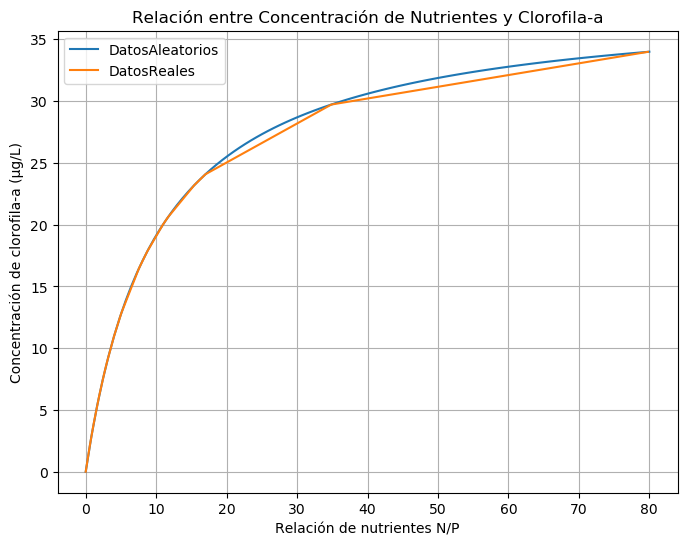

In [5]:
# Definir la función de Michaelis-Menten
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Parámetros de la función
Vmax = A  # Máxima concentración de clorofila-a en µg/L
Km = A/2      # Constante de Michaelis-Menten (La mitad del máximo)

# Rango de concentraciones de nutrientes
nutrientes = np.linspace(0, 80, 100)

# Datos de nutrientes reales
mask_nutr = ~np.isnan(data['CLOROFILA (ug/l)']) & ~np.isnan(data['NITROGENO TOTAL (mg/l)']) & ~np.isnan(data['FOSFORO TOTAL (mg/l)'])
dataN = data[mask_nutr]
nutrientesR = dataN['N/P'].dropna()
nutrientesR = nutrientesR.sort_values()
nutrientesR = np.array(nutrientesR)

# Calcular la concentración de clorofila-a para cada concentración de nutrientes
concentracion_clorofila = michaelis_menten(nutrientes, Vmax, Km)
concentracion_clorofilaR = michaelis_menten(nutrientesR, Vmax, Km)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(nutrientes, concentracion_clorofila, label='DatosAleatorios')
plt.plot(nutrientesR, concentracion_clorofilaR, label='DatosReales')
plt.title('Relación entre Concentración de Nutrientes y Clorofila-a')
plt.xlabel('Relación de nutrientes N/P')
plt.ylabel('Concentración de clorofila-a (µg/L)')
plt.grid(True)
plt.legend()
plt.show()

# Luz

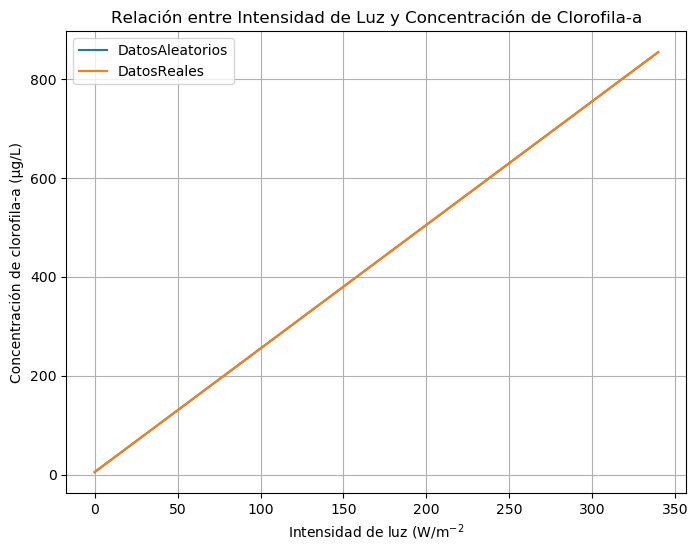

In [6]:
# Definir la relación lineal
def relacion_lineal(luz, pendiente, intercepto):
    return pendiente * luz + intercepto

# Parámetros de la función
pendiente = 2.5  # Cambio en la concentración de clorofila-a por unidad de luz
intercepto = 5   # Concentración de clorofila-a cuando la luz es cero

# Datos reales de radiación
mask_luz = ~np.isnan(data['CLOROFILA (ug/l)']) & ~np.isnan(data['Radiacion'])
dataL = data[mask_luz]
luzR = dataL['Radiacion'].dropna()
luzR = luzR.sort_values()
luzR = np.array(luzR, dtype=float)

# Rango de intensidades de luz 
luz = np.linspace(0, max(luzR), 100)

# Calcular la concentración de clorofila-a para cada intensidad de luz
concentracion_clorofilaL = relacion_lineal(luz, pendiente, intercepto)
concentracion_clorofilaLR = relacion_lineal(luzR, pendiente, intercepto)

# Graficar relación luz-Clorofila
plt.figure(figsize=(8, 6))
plt.plot(luz, concentracion_clorofilaL, label='DatosAleatorios')
plt.plot(luzR, concentracion_clorofilaLR, label='DatosReales')
plt.title('Relación entre Intensidad de Luz y Concentración de Clorofila-a')
plt.xlabel('Intensidad de luz (W/m$^{-2}$')
plt.ylabel('Concentración de clorofila-a (µg/L)')
plt.grid(True)
plt.legend()
plt.show()